In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import timedelta

In [2]:
wether_21=pd.read_csv('C:/Users/user/Desktop/안동/wether_2021.csv',encoding='euc-kr')
wether_21

,Unnamed: 0,date,평균기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),합계 일사량(MJ/m2)
0,0,2021-01-01,-4.218346,0.0,2.209590,58.993259,10.10
1,1,2021-01-02,-3.612569,0.0,2.319236,49.781458,11.79
2,2,2021-01-03,-3.513403,0.0,3.175972,35.520069,11.79
3,3,2021-01-04,-3.474236,0.0,0.802778,49.206806,9.88
4,4,2021-01-05,-2.716887,0.0,2.312509,42.212092,9.88
...,...,...,...,...,...,...,...
349,349,2021-12-16,4.506181,0.0,0.877639,73.211181,4.73
350,350,2021-12-17,-1.204375,0.0,5.137847,35.304444,9.77
351,351,2021-12-18,-5.558889,0.0,1.693958,41.333542,10.89
352,352,2021-12-19,-0.367014,0.0,2.681181,51.112153,10.89


In [3]:
wether=pd.read_csv('C:/Users/user/Desktop/안동/wether.csv',encoding='euc-kr')
wether

,Unnamed: 0,date,평균기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),합계 일사량(MJ/m2)
0,0,2018-04-20,19.3,0.0,1.0,43.3,26.69
1,1,2018-04-21,21.3,0.0,1.4,40.0,27.05
2,2,2018-04-03,19.7,0.0,1.6,53.6,15.99
3,3,2018-08-22,29.3,0.0,2.4,63.1,20.56
4,4,2018-08-23,28.5,0.5,4.0,70.5,14.61
...,...,...,...,...,...,...,...
1075,27230,2020-12-29,1.3,0.2,1.3,76.1,6.29
1076,27239,2020-12-30,-7.8,0.0,4.6,39.1,11.27
1077,27247,2020-12-31,-7.9,0.0,3.5,44.8,10.65
1078,27252,2021-01-01,NaN,NaN,NaN,NaN,NaN


In [4]:
wether=wether[wether['date']!='2021-01-01']
wether=wether[wether['date']!='2021-01-02']
wether=wether.drop(['Unnamed: 0'],axis=1)
wether_21=wether_21.drop(['Unnamed: 0'],axis=1)

In [5]:
wet=pd.concat([wether,wether_21])
wet

,date,평균기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),합계 일사량(MJ/m2)
0,2018-04-20,19.300000,0.0,1.000000,43.300000,26.69
1,2018-04-21,21.300000,0.0,1.400000,40.000000,27.05
2,2018-04-03,19.700000,0.0,1.600000,53.600000,15.99
3,2018-08-22,29.300000,0.0,2.400000,63.100000,20.56
4,2018-08-23,28.500000,0.5,4.000000,70.500000,14.61
...,...,...,...,...,...,...
349,2021-12-16,4.506181,0.0,0.877639,73.211181,4.73
350,2021-12-17,-1.204375,0.0,5.137847,35.304444,9.77
351,2021-12-18,-5.558889,0.0,1.693958,41.333542,10.89
352,2021-12-19,-0.367014,0.0,2.681181,51.112153,10.89


In [6]:
plt.rc("font",family='Malgun Gothic')
sns.set(font='Malgun Gothic',
       rc={'axes.unicode_minus':False},
       style='darkgrid')


C:\Users\user\AppData\Local\Temp/ipykernel_18620/1288312641.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(data_cor,dtype=np.bool)


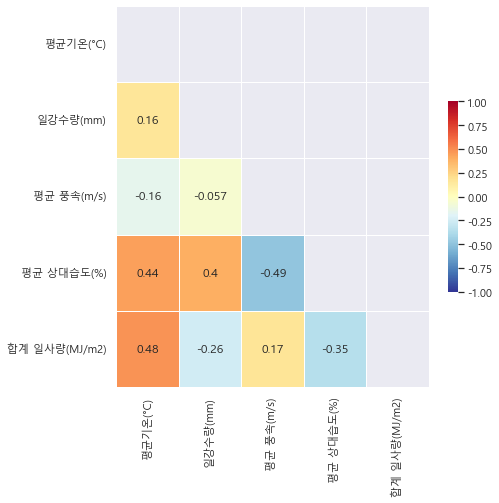

In [7]:
data_cor=wet[['평균기온(°C)','일강수량(mm)','평균 풍속(m/s)','평균 상대습도(%)','합계 일사량(MJ/m2)']].corr(method="pearson")
fig, ax=plt.subplots(figsize=(7,7))

mask=np.zeros_like(data_cor,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

sns.heatmap(data_cor, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
            ) 
plt.show()